In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import ace_tools as tools;

# Load the employee dataset
file_path = "data/processed/train.csv"
df = pd.read_csv(file_path)

# Set visualization aesthetics
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Basic Information
summary = {
    "Shape": df.shape,
    "Missing Values": df.isnull().sum(),
    "Attrition Counts": df['Attrition'].value_counts(),
    "Data Types": df.dtypes
}

In [ ]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove("Attrition")  # exclude target from categorical

# Convert Attrition to binary for correlation
df_encoded = pd.get_dummies(df, drop_first=True)

# Correlation matrix
correlation_matrix = df_encoded.corr()

# Top correlated features with Attrition_Stayed or Attrition_Left
attrition_col = [col for col in correlation_matrix.columns if 'Attrition_' in col]
if attrition_col:
    attrition_col = attrition_col[0]
    top_corr = correlation_matrix[attrition_col].abs().sort_values(ascending=False)[1:15]
else:
    top_corr = pd.Series()

# Distribution of numerical features
df[numerical_cols].hist(bins=20, figsize=(18, 12))
plt.suptitle("Distributions of Numerical Features", fontsize=20)
plt.tight_layout()
plt.show()


In [ ]:
# Countplots for categorical features by Attrition
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.title(f"{col} vs Attrition")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Boxplots for numerical features by Attrition
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Attrition', y=col)
    plt.title(f"{col} Distribution by Attrition")
    plt.tight_layout()
    plt.show()


In [ ]:
# Top correlated features with Attrition
if not top_corr.empty:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=top_corr.values, y=top_corr.index)
    plt.title("Top Correlated Features with Attrition")
    plt.tight_layout()
    plt.show()

In [ ]:
# Full Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, linewidths=.5)
plt.title("Full Correlation Heatmap")
plt.tight_layout()
plt.show()

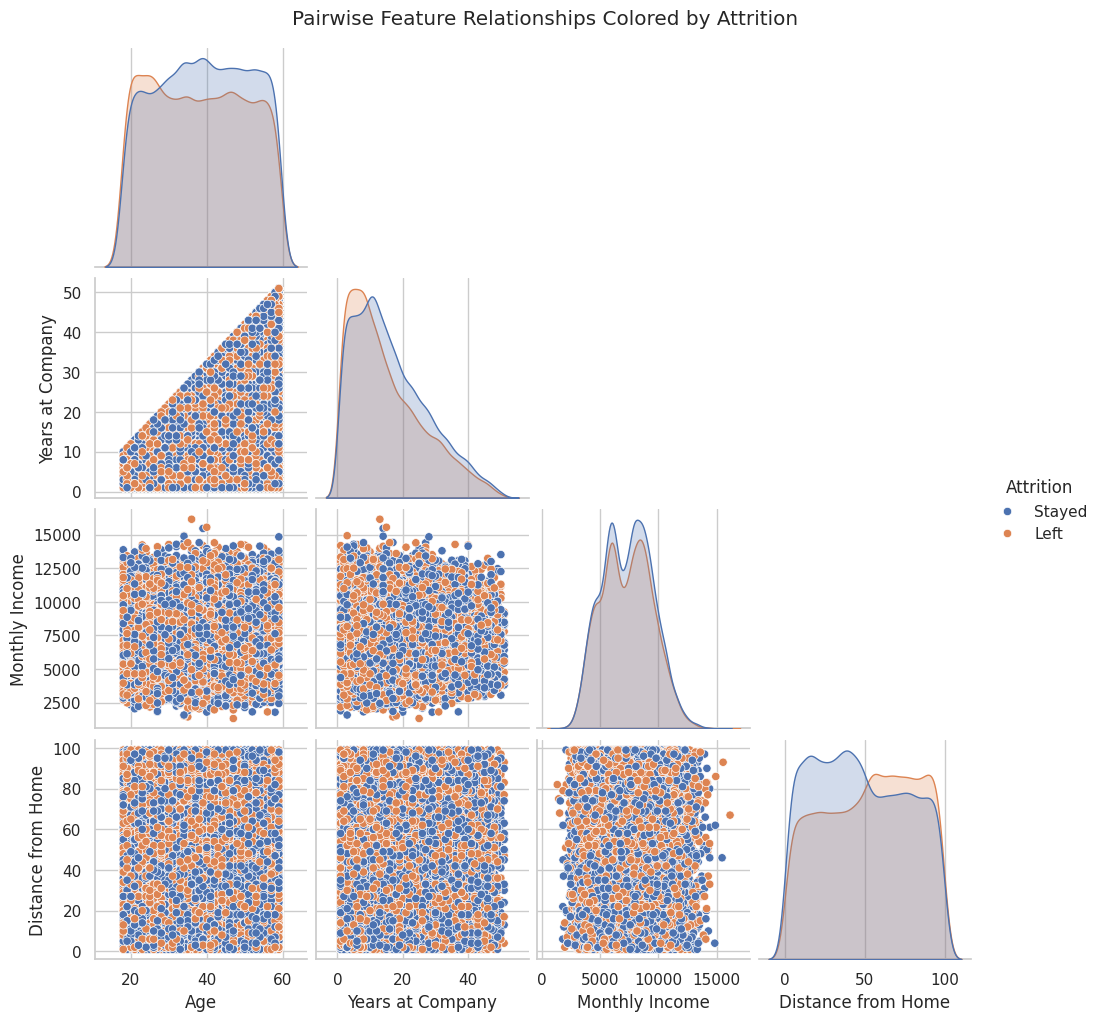

In [5]:
selected_features = ['Age', 'Years at Company', 'Monthly Income', 'Distance from Home', 'Attrition']
sns.pairplot(df[selected_features], hue='Attrition', corner=True, diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships Colored by Attrition", y=1.02)
plt.show()
